In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [27]:
df_bg = pd.read_excel("C:/Users/peiya/Desktop/clinicaldata(Sheet3).xlsx", sheet_name="BG_2").dropna(subset=['GP']).drop(['Unnamed: 10', 'Unnamed: 11', 'Slice_ID','brain_region'], axis=1)
df_bg.head()

,bb_id,PSPRS,GP,Area_GP,STR,Area_STR,STN,Area_STN
0,NP15-00197,47,"0,440,8,2830",4.347816e+07,"1,542,13,1295",9.798452e+07,"0,72,30,655",4.189264e+06
1,NP15-00272,57,"3,281,31,5350",1.697559e+07,"175,411,21,5827",4.657383e+07,"5,84,60,1698",3.817557e+06
3,NP16-00042,43,"2,260,17,5855",4.257196e+07,"55,762,32,7655",1.025558e+08,"1,194,19,2597",1.068454e+07
4,NP16-00069,49,"0,33,3,1041",2.183671e+07,"1,82,9,1627",6.737051e+07,"1,112,25,2407",8.562177e+06
5,NP17-00109,55,"2,267,40,5634",3.365823e+07,"1,323,9,1259",7.302965e+07,"1,231,33,2359",6.095402e+06


In [29]:
df_dn = pd.read_excel("C:/Users/peiya/Desktop/clinicaldata(Sheet3).xlsx", sheet_name="DN_2").dropna(subset=['Area_DN']).drop(['Unnamed: 10', 'Unnamed: 11','Slice_ID','brain_region', 'PSPRS'], axis=1)
df_dn.head()

,bb_id,Area_DN,TA_DN,CB_DN,NFT_DN,TF_DN,total_DN
0,NP15-00197,3.622372e+07,0.0,58.0,107.0,5587.0,5752
1,NP15-00272,1.049692e+07,1.0,26.0,64.0,3467.0,3558
2,NP16-00042,5.505372e+07,0.0,52.0,84.0,4724.0,4860
3,NP16-00069,5.278826e+07,0.0,53.0,38.0,11274.0,11365
5,NP17-00109,2.763294e+07,8.0,73.0,21.0,2997.0,3099


In [36]:
# Inner join the two dataframes on bb_id
merged_df = pd.merge(df_bg, df_dn, on='bb_id', how='inner')
merged_df.head()

,bb_id,PSPRS,GP,Area_GP,STR,Area_STR,STN,Area_STN,Area_DN,TA_DN,CB_DN,NFT_DN,TF_DN,total_DN
0,NP15-00197,47,"0,440,8,2830",4.347816e+07,"1,542,13,1295",9.798452e+07,"0,72,30,655",4.189264e+06,3.622372e+07,0.0,58.0,107.0,5587.0,5752
1,NP15-00272,57,"3,281,31,5350",1.697559e+07,"175,411,21,5827",4.657383e+07,"5,84,60,1698",3.817557e+06,1.049692e+07,1.0,26.0,64.0,3467.0,3558
2,NP16-00042,43,"2,260,17,5855",4.257196e+07,"55,762,32,7655",1.025558e+08,"1,194,19,2597",1.068454e+07,5.505372e+07,0.0,52.0,84.0,4724.0,4860
3,NP16-00069,49,"0,33,3,1041",2.183671e+07,"1,82,9,1627",6.737051e+07,"1,112,25,2407",8.562177e+06,5.278826e+07,0.0,53.0,38.0,11274.0,11365
4,NP17-00109,55,"2,267,40,5634",3.365823e+07,"1,323,9,1259",7.302965e+07,"1,231,33,2359",6.095402e+06,2.763294e+07,8.0,73.0,21.0,2997.0,3099


In [38]:
# Extract comma-separated values into separate columns
merged_df[['TA_GP', 'CB_GP', 'NFT_GP', 'TF_GP']] = merged_df['GP'].str.split(',', expand=True).astype(float)
merged_df[['TA_STR', 'CB_STR', 'NFT_STR', 'TF_STR']] = merged_df['STR'].str.split(',', expand=True).astype(float)
merged_df[['TA_STN', 'CB_STN', 'NFT_STN', 'TF_STN']] = merged_df['STN'].str.split(',', expand=True).astype(float)
merged_df = merged_df.drop(['STN','GP','STR'], axis=1)

merged_df.head()

KeyError: 'GP'

In [39]:
merged_df.columns

Index(['bb_id', 'PSPRS', 'Area_GP', 'Area_STR', 'Area_STN', 'Area_DN', 'TA_DN',
       'CB_DN', 'NFT_DN', 'TF_DN', 'total_DN', 'TA_GP', 'CB_GP', 'NFT_GP',
       'TF_GP', 'TA_STR', 'CB_STR', 'NFT_STR', 'TF_STR', 'TA_STN', 'CB_STN',
       'NFT_STN', 'TF_STN'],
      dtype='object')

In [ ]:
merged_df['total_GP'] = merged_df['TA_GP'] + merged_df['CB_GP'] + merged_df['NFT_GP'] + merged_df['TF_GP']
merged_df['total_STR'] = merged_df['TA_STR'] + merged_df['CB_STR'] + merged_df['NFT_STR'] + merged_df['TF_STR']
merged_df['total_STN'] = merged_df['TA_STN'] + merged_df['CB_STN'] + merged_df['NFT_STN'] + merged_df['TF_STN']

In [51]:
def calculate_tau_densities(type, region):
    merged_df[type+'_'+region+'_density'] = merged_df[type+'_'+region] / merged_df['Area_'+region]
calculate_tau_densities('total', 'GP')
calculate_tau_densities('total', 'STR')
calculate_tau_densities('total', 'STN')
calculate_tau_densities('total', 'DN')

In [67]:
calculate_tau_densities('hallmarks', 'GP')
calculate_tau_densities('hallmarks', 'STR')
calculate_tau_densities('hallmarks', 'STN')
calculate_tau_densities('hallmarks', 'DN')

In [48]:
merged_df.columns

Index(['bb_id', 'PSPRS', 'Area_GP', 'Area_STR', 'Area_STN', 'Area_DN', 'TA_DN',
       'CB_DN', 'NFT_DN', 'TF_DN', 'total_DN', 'TA_GP', 'CB_GP', 'NFT_GP',
       'TF_GP', 'TA_STR', 'CB_STR', 'NFT_STR', 'TF_STR', 'TA_STN', 'CB_STN',
       'NFT_STN', 'TF_STN', 'TA_GP_density', 'CB_GP_density', 'NFT_GP_density',
       'TF_GP_density', 'TA_STR_density', 'CB_STR_density', 'NFT_STR_density',
       'TF_STR_density', 'TA_STN_density', 'CB_STN_density', 'NFT_STN_density',
       'TF_STN_density', 'TA_DN_density', 'CB_DN_density', 'NFT_DN_density',
       'TF_DN_density', 'total_GP', 'total_STR', 'total_STN',
       'total_GP_density', 'total_STR_density', 'total_STN_density',
       'total_DN_density'],
      dtype='object')

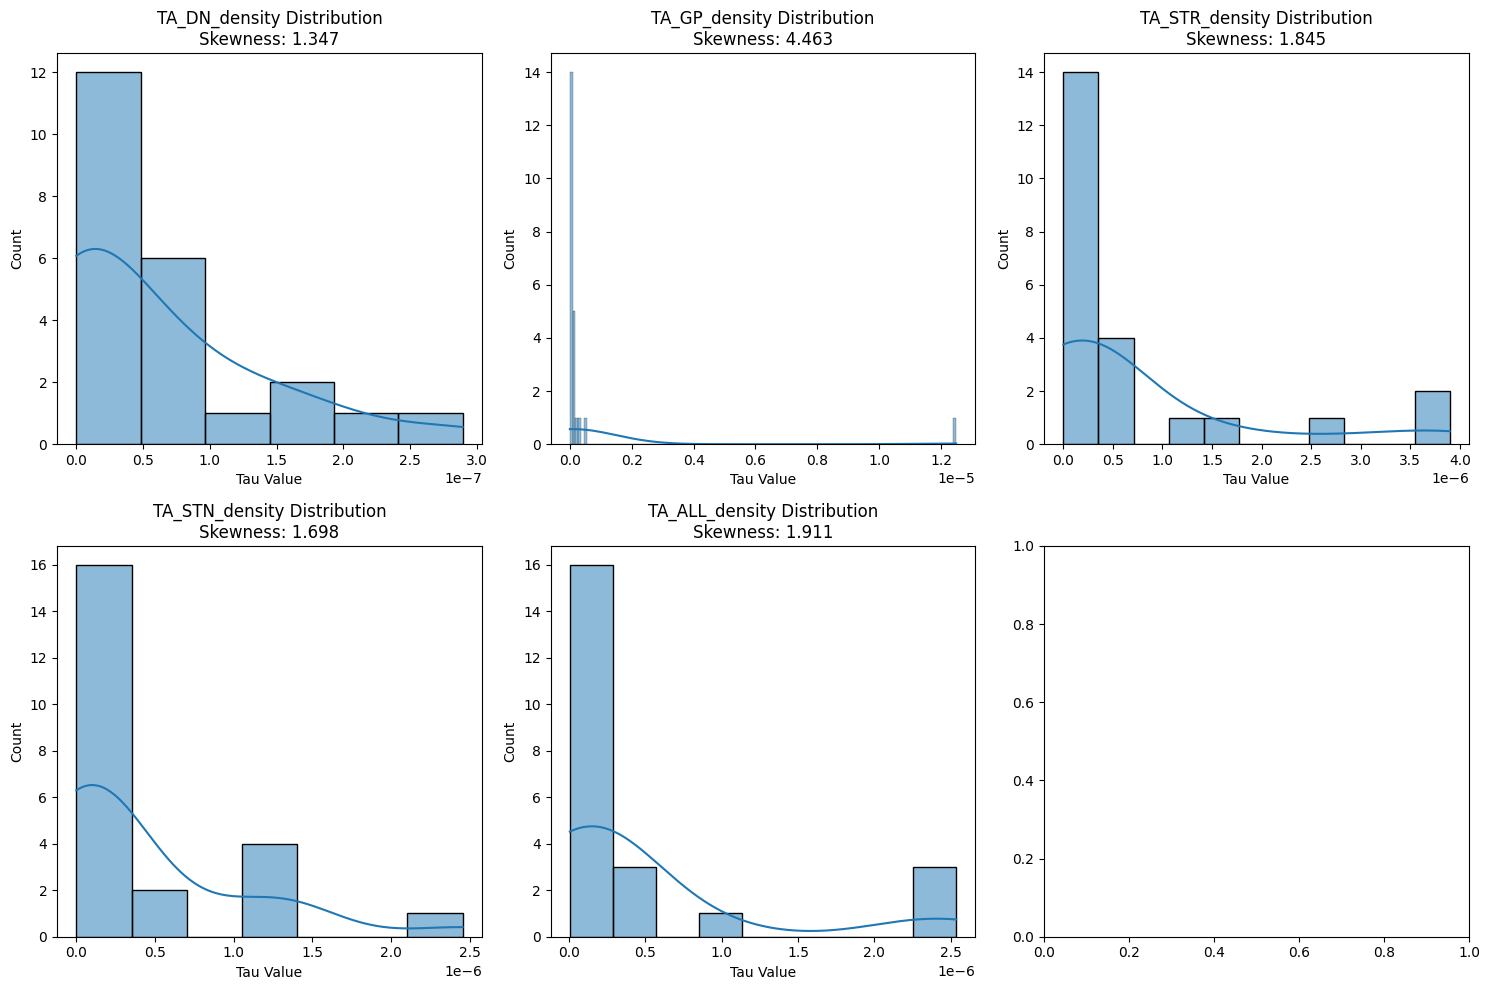

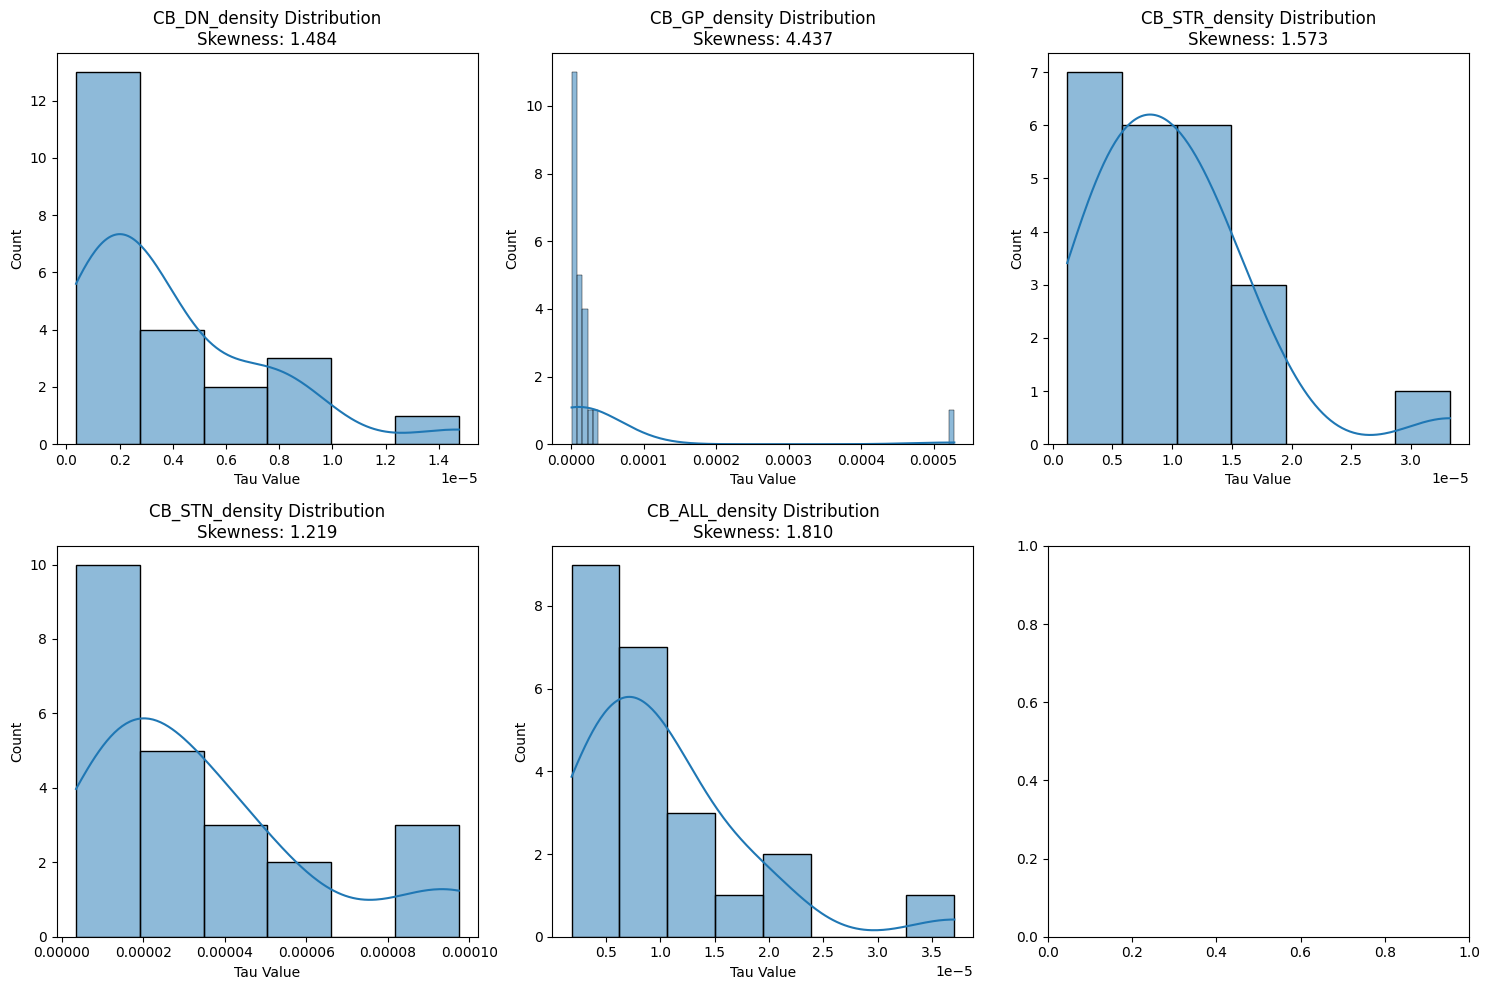

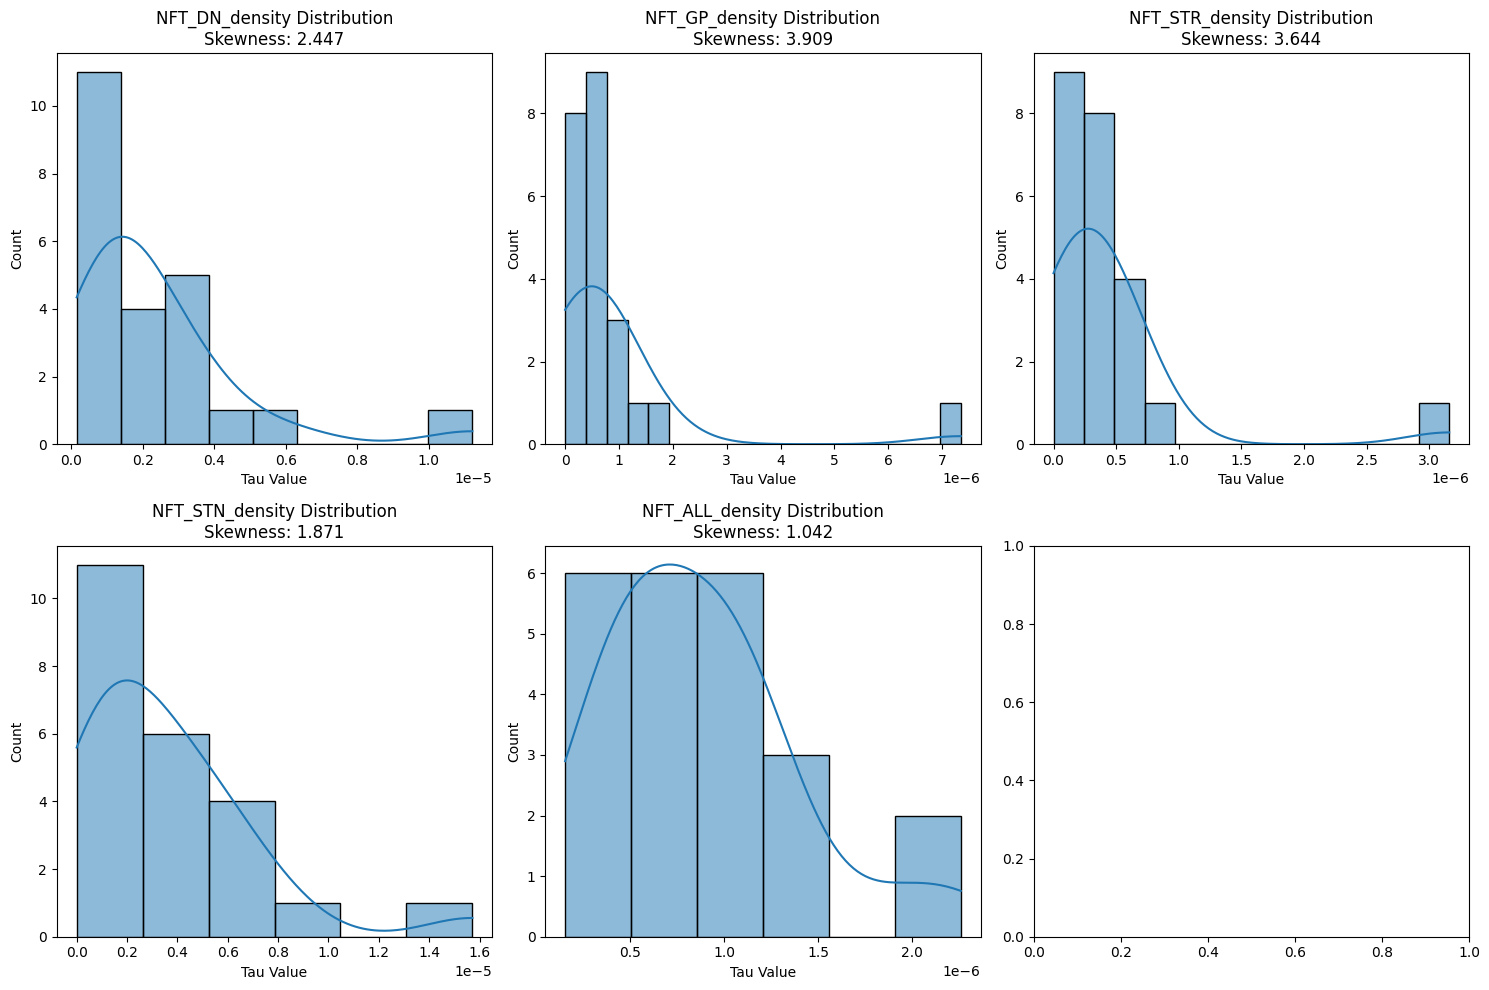

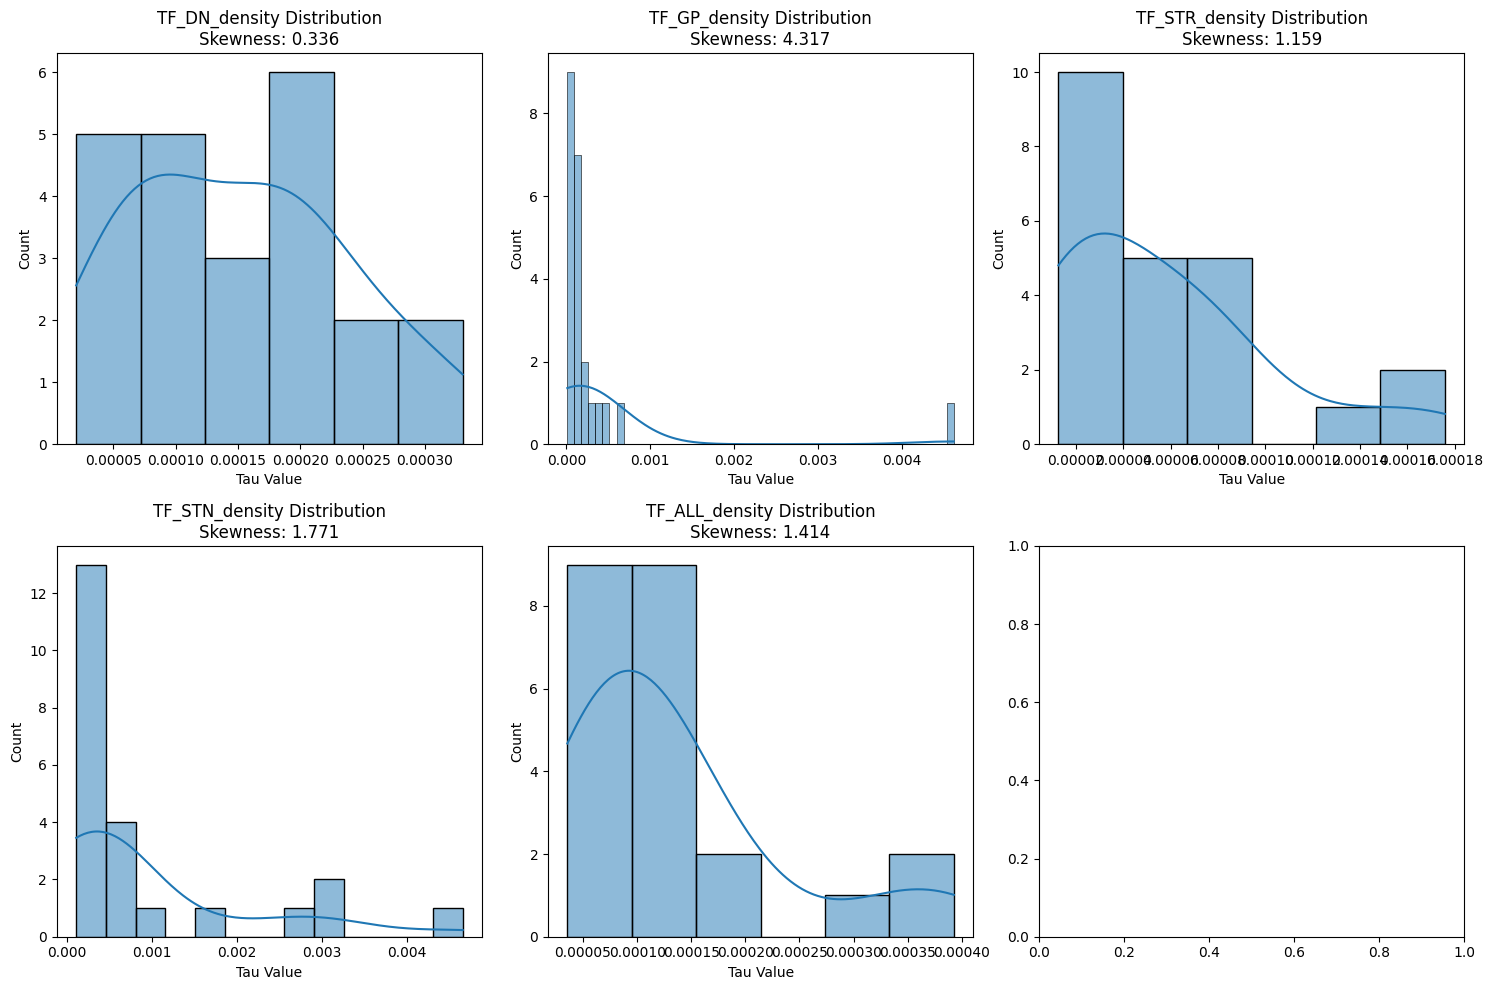

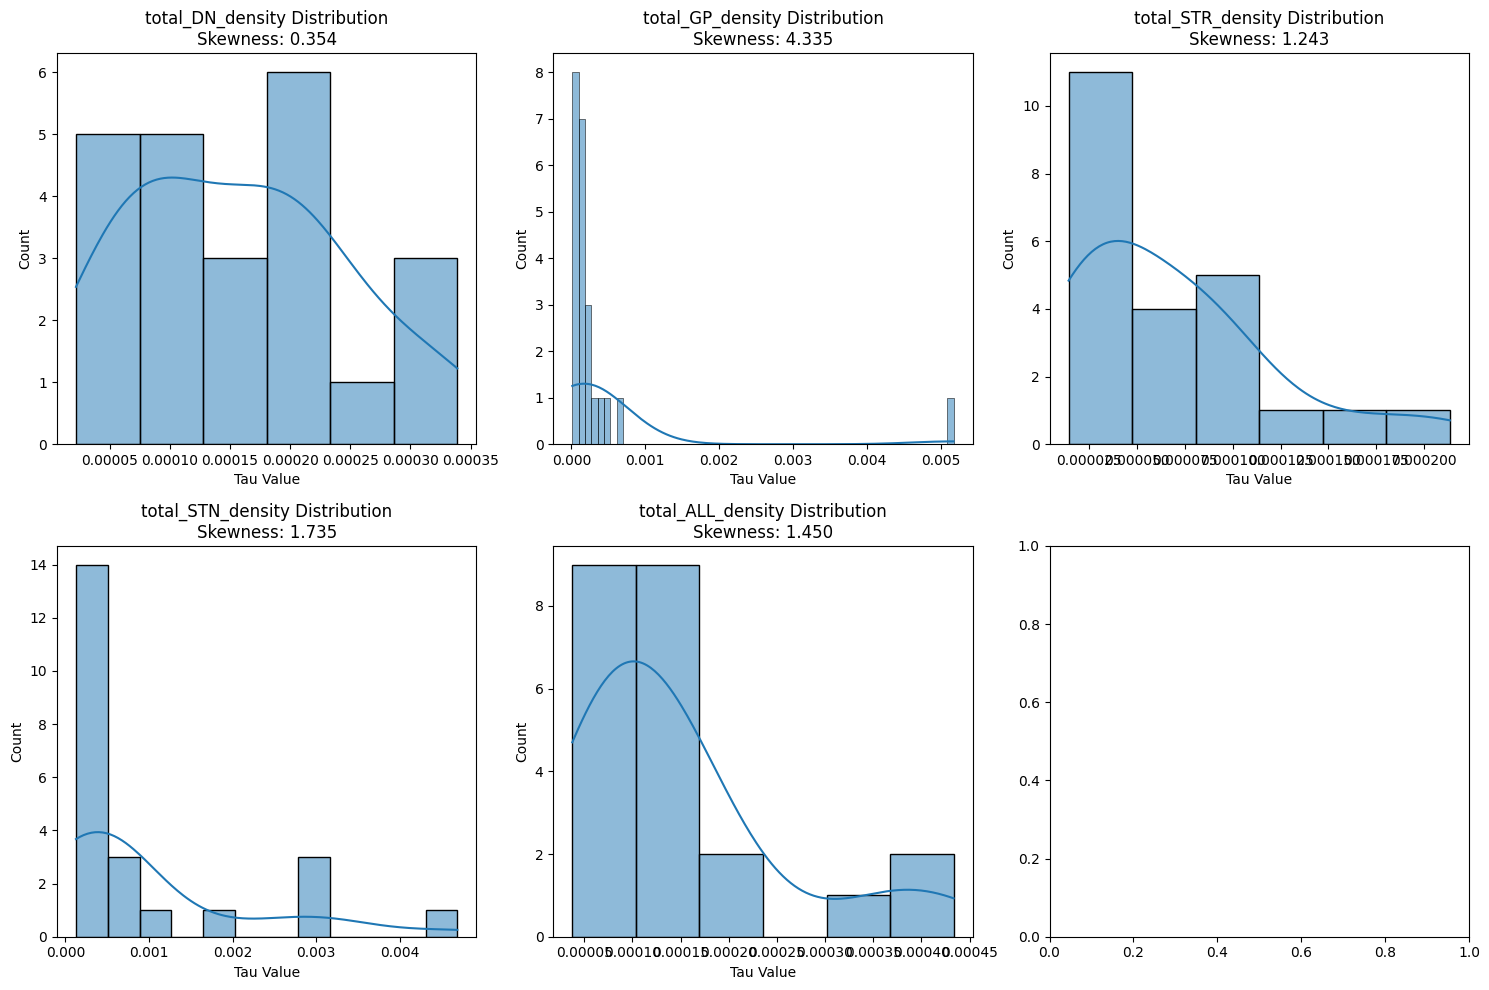

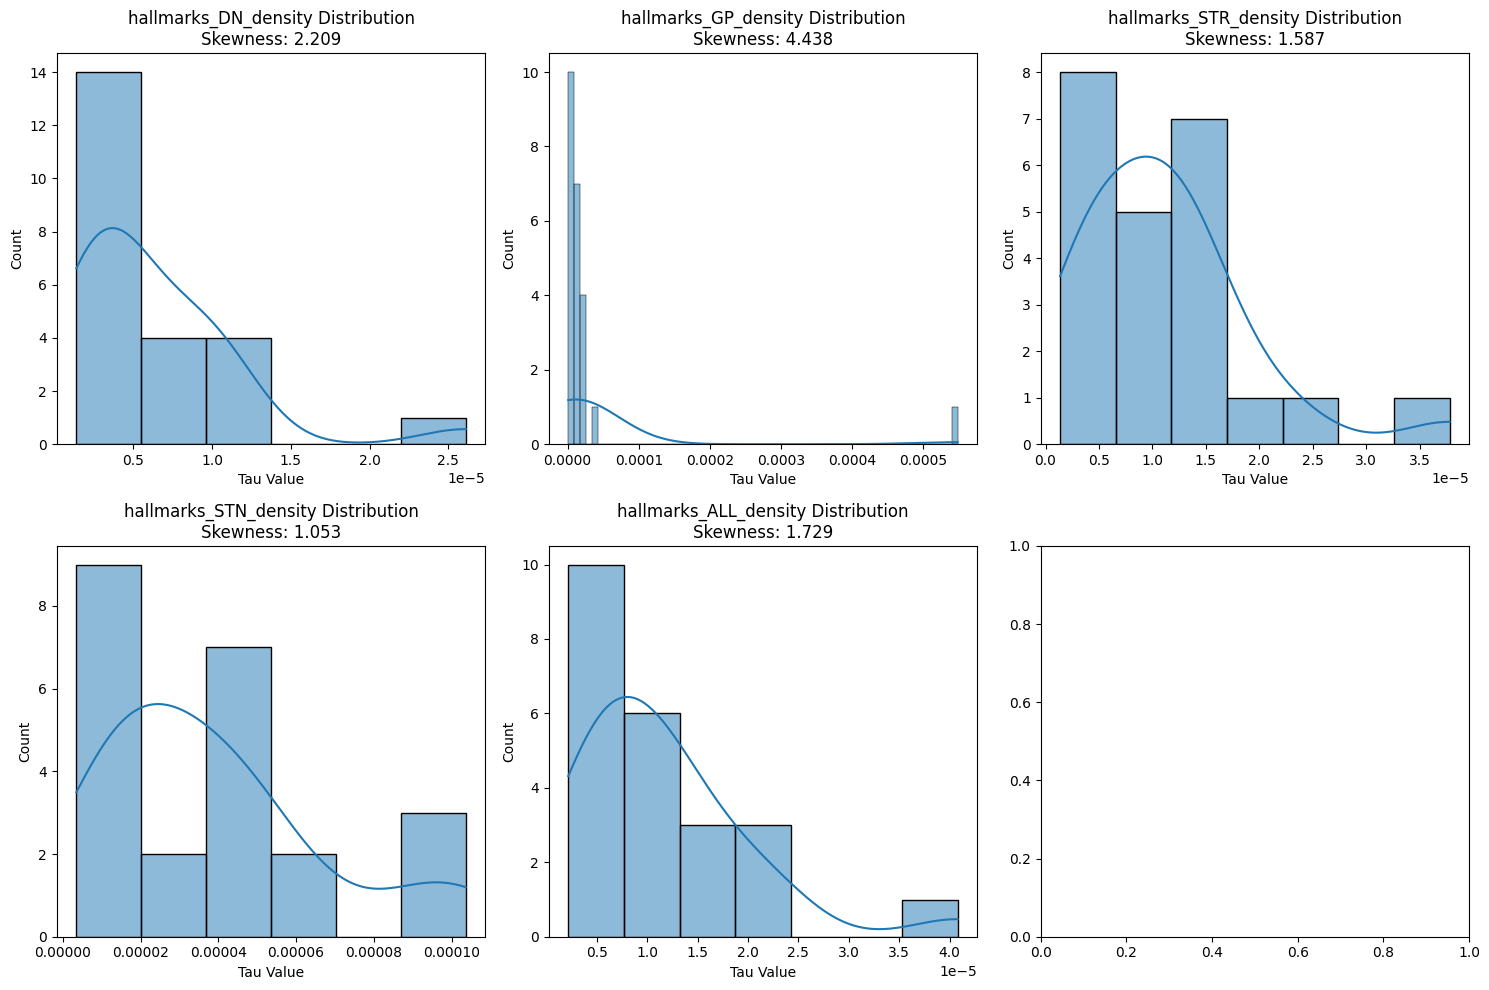

In [72]:
def visualize_skewness(type, log=False):
   # Extract tau-related columns
    tau_columns = [type+'_DN_density', type+'_GP_density', type+'_STR_density', type+'_STN_density', type+'_ALL_density']
    if log:
        tau_columns = [col+'_log10' for col in tau_columns]

    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    # Plot histograms and calculate skewness for each tau measure
    for i, col in enumerate(tau_columns):
        # Calculate skewness
        skewness = stats.skew(merged_df[col].dropna())
        
        # Plot histogram
        sns.histplot(merged_df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col} Distribution\nSkewness: {skewness:.3f}')
        axes[i].set_xlabel('Tau Value')
        
    plt.tight_layout()
    plt.show()

visualize_skewness('TA')
visualize_skewness('CB')
visualize_skewness('NFT')
visualize_skewness('TF')
visualize_skewness('total')
visualize_skewness('hallmarks')

[1] Log total tau density in all subcortical regions combined

In [53]:
import numpy as np
density_columns = [col for col in merged_df.columns if 'density' in col]

# Create log10 transformed columns
for col in density_columns:
    # Add small constant (1) to handle zeros and apply log10 transformation
    log_col_name = f"{col}_log10"
    merged_df[log_col_name] = np.log10(merged_df[col] + 1)
    
print(f"Created log10 transformed columns for {len(density_columns)} density features")
display(merged_df.head())

Created log10 transformed columns for 21 density features


,bb_id,PSPRS,Area_GP,Area_STR,Area_STN,Area_DN,TA_DN,CB_DN,NFT_DN,TF_DN,...,TF_STN_density_log10,TA_DN_density_log10,CB_DN_density_log10,NFT_DN_density_log10,TF_DN_density_log10,total_GP_density_log10,total_STR_density_log10,total_STN_density_log10,total_DN_density_log10,total_ALL_density_log10
0,NP15-00197,47,4.347816e+07,9.798452e+07,4.189264e+06,3.622372e+07,0.0,58.0,107.0,5587.0,...,0.000068,0.000000e+00,6.953746e-07,1.282845e-06,0.000067,0.000033,0.000008,0.000078,0.000069,0.000028
1,NP15-00272,57,1.697559e+07,4.657383e+07,3.817557e+06,1.049692e+07,1.0,26.0,64.0,3467.0,...,0.000193,4.137353e-08,1.075710e-06,2.647898e-06,0.000143,0.000145,0.000060,0.000210,0.000147,0.000098
2,NP16-00042,43,4.257196e+07,1.025558e+08,1.068454e+07,5.505372e+07,0.0,52.0,84.0,4724.0,...,0.000106,0.000000e+00,4.102048e-07,6.626383e-07,0.000037,0.000063,0.000036,0.000114,0.000038,0.000046
3,NP16-00069,49,2.183671e+07,6.737051e+07,8.562177e+06,5.278826e+07,0.0,53.0,38.0,11274.0,...,0.000122,0.000000e+00,4.360363e-07,3.126298e-07,0.000093,0.000021,0.000011,0.000129,0.000093,0.000048
4,NP17-00109,55,3.365823e+07,7.302965e+07,6.095402e+06,2.763294e+07,8.0,73.0,21.0,2997.0,...,0.000168,1.257324e-07,1.147307e-06,3.300475e-07,0.000047,0.000077,0.000009,0.000187,0.000049,0.000041


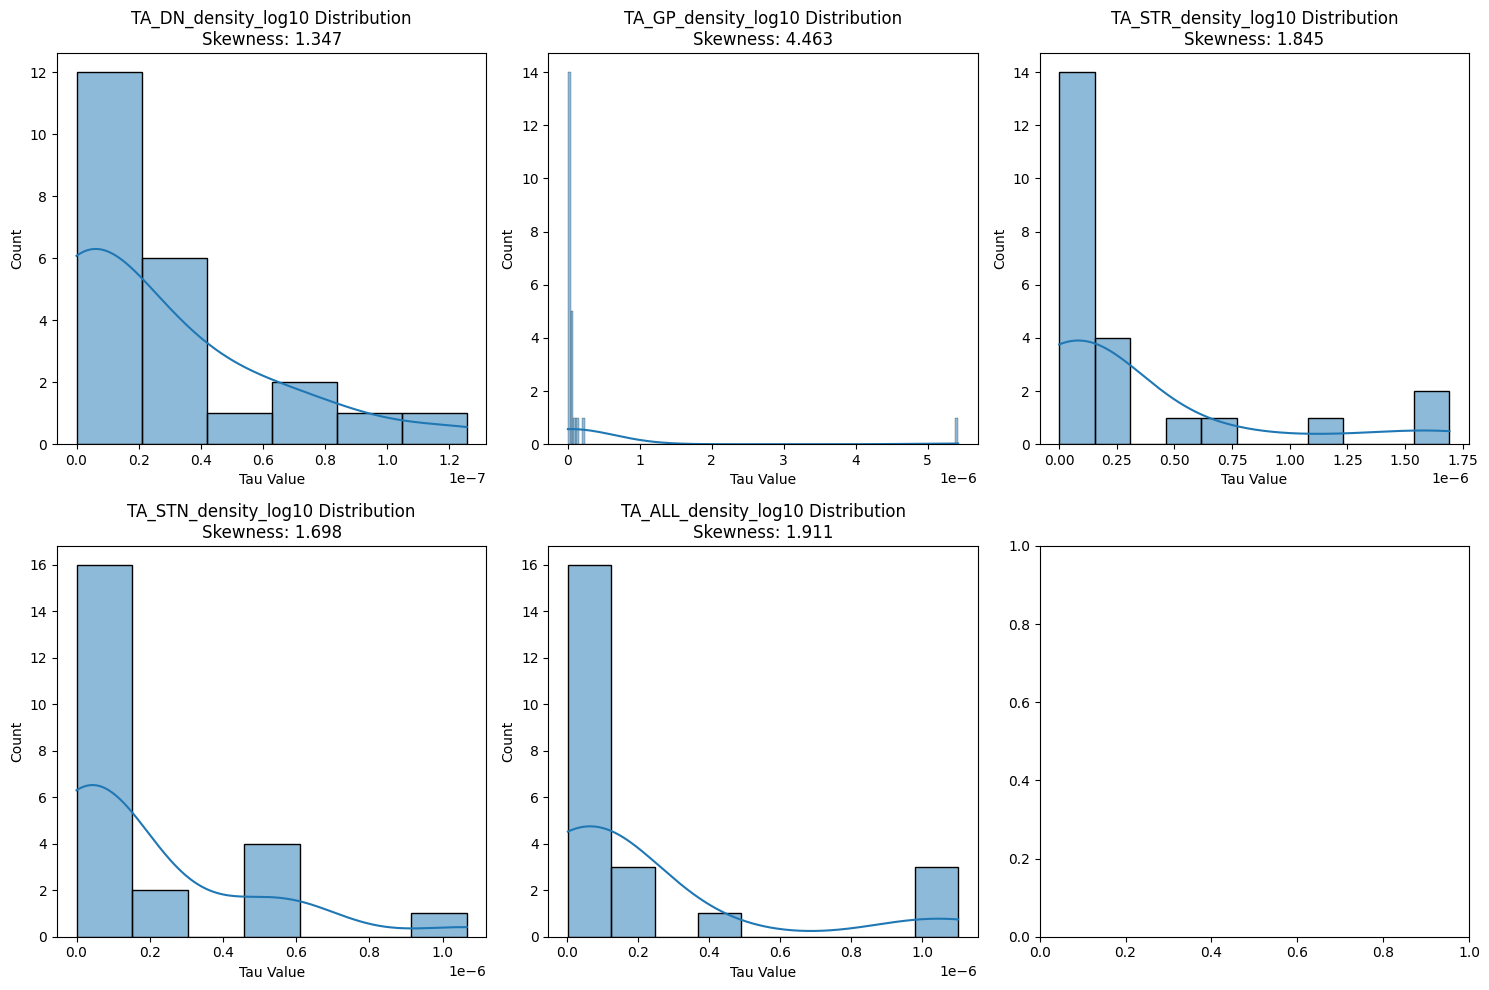

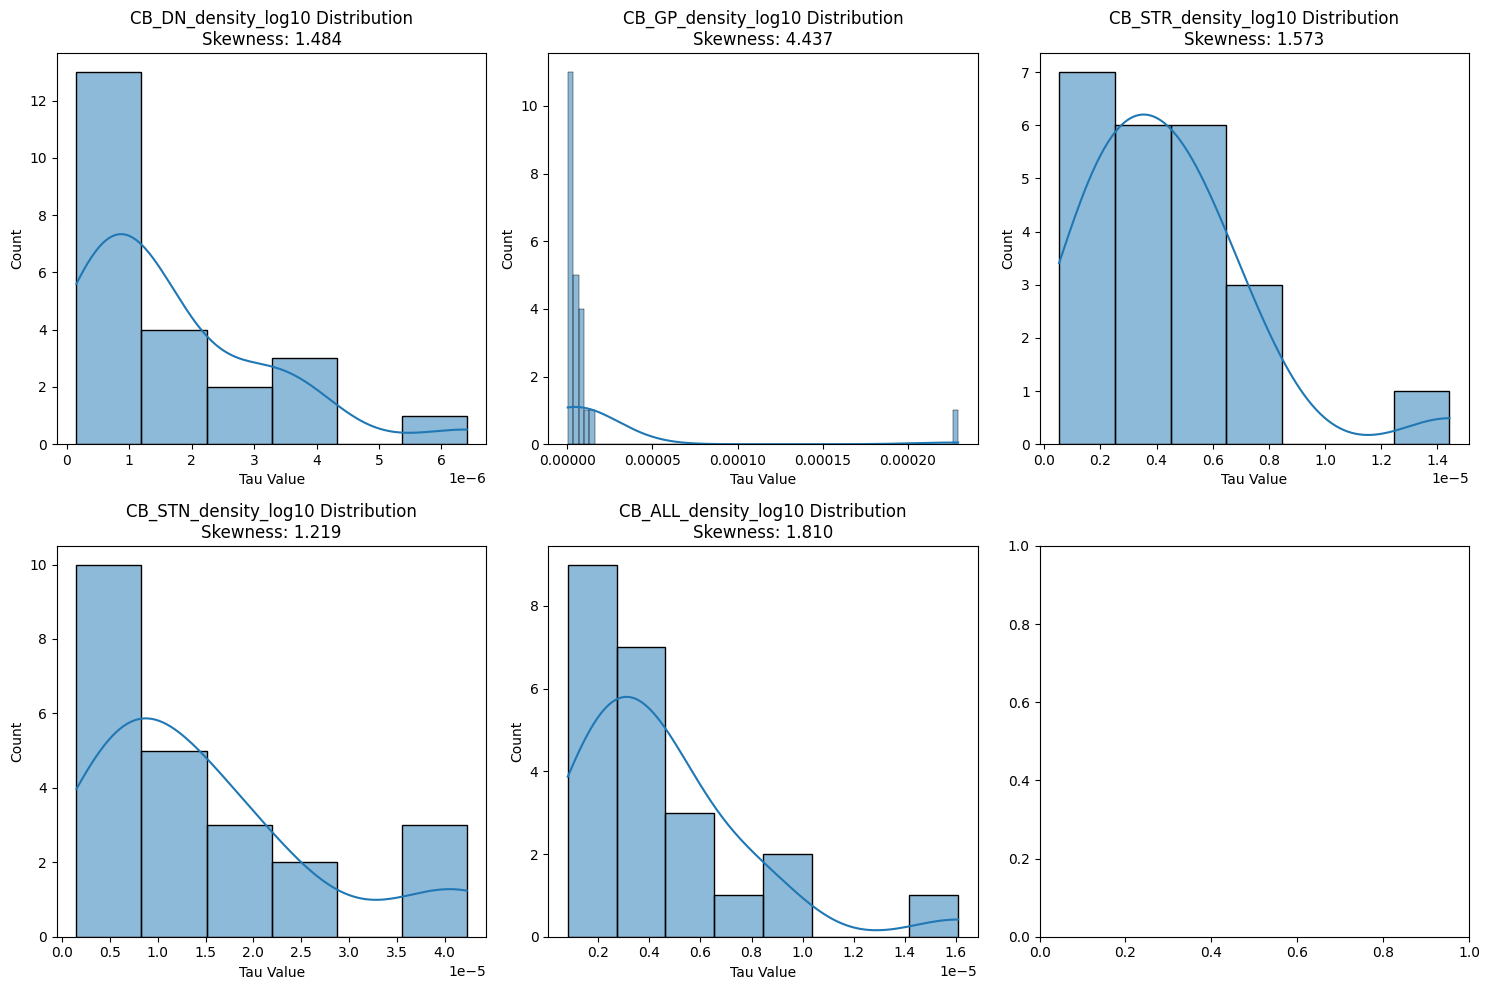

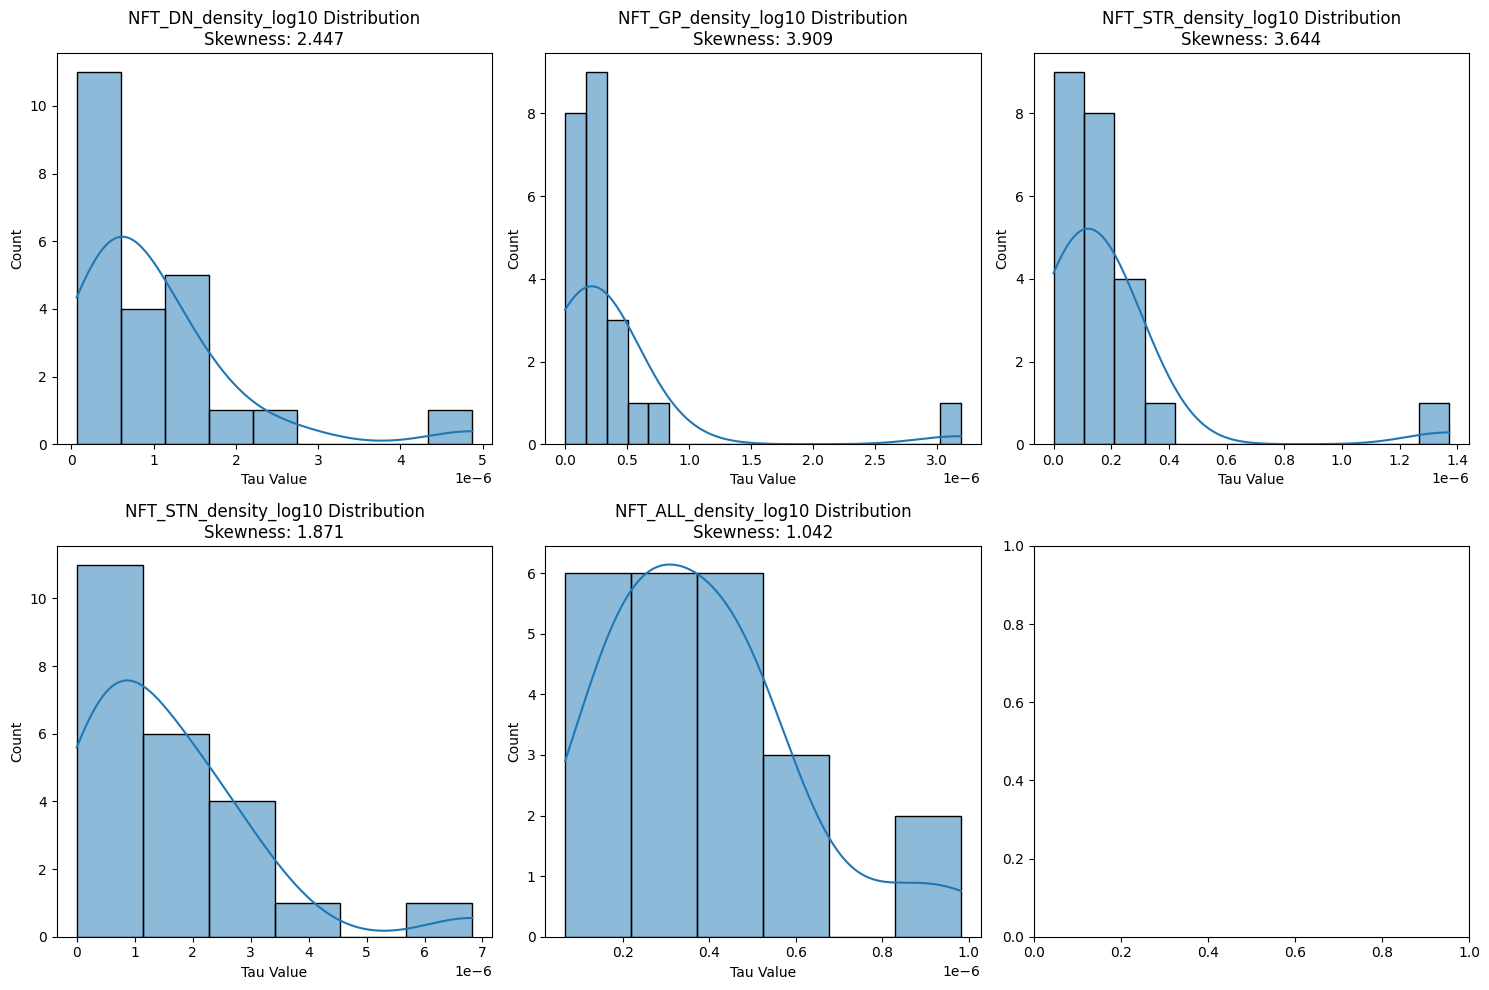

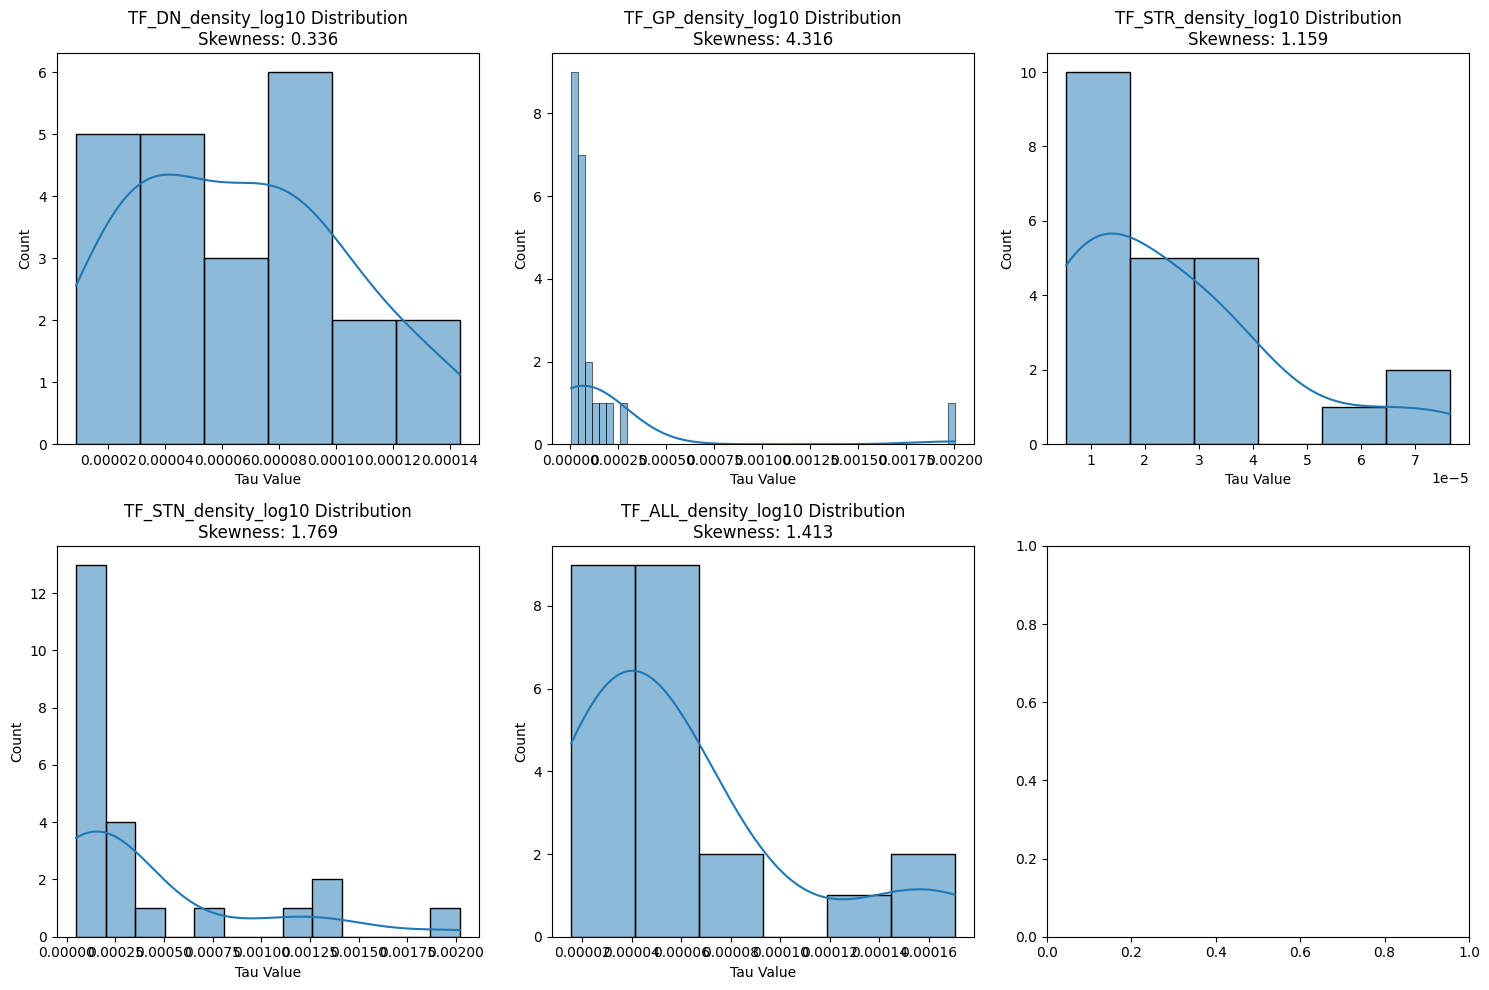

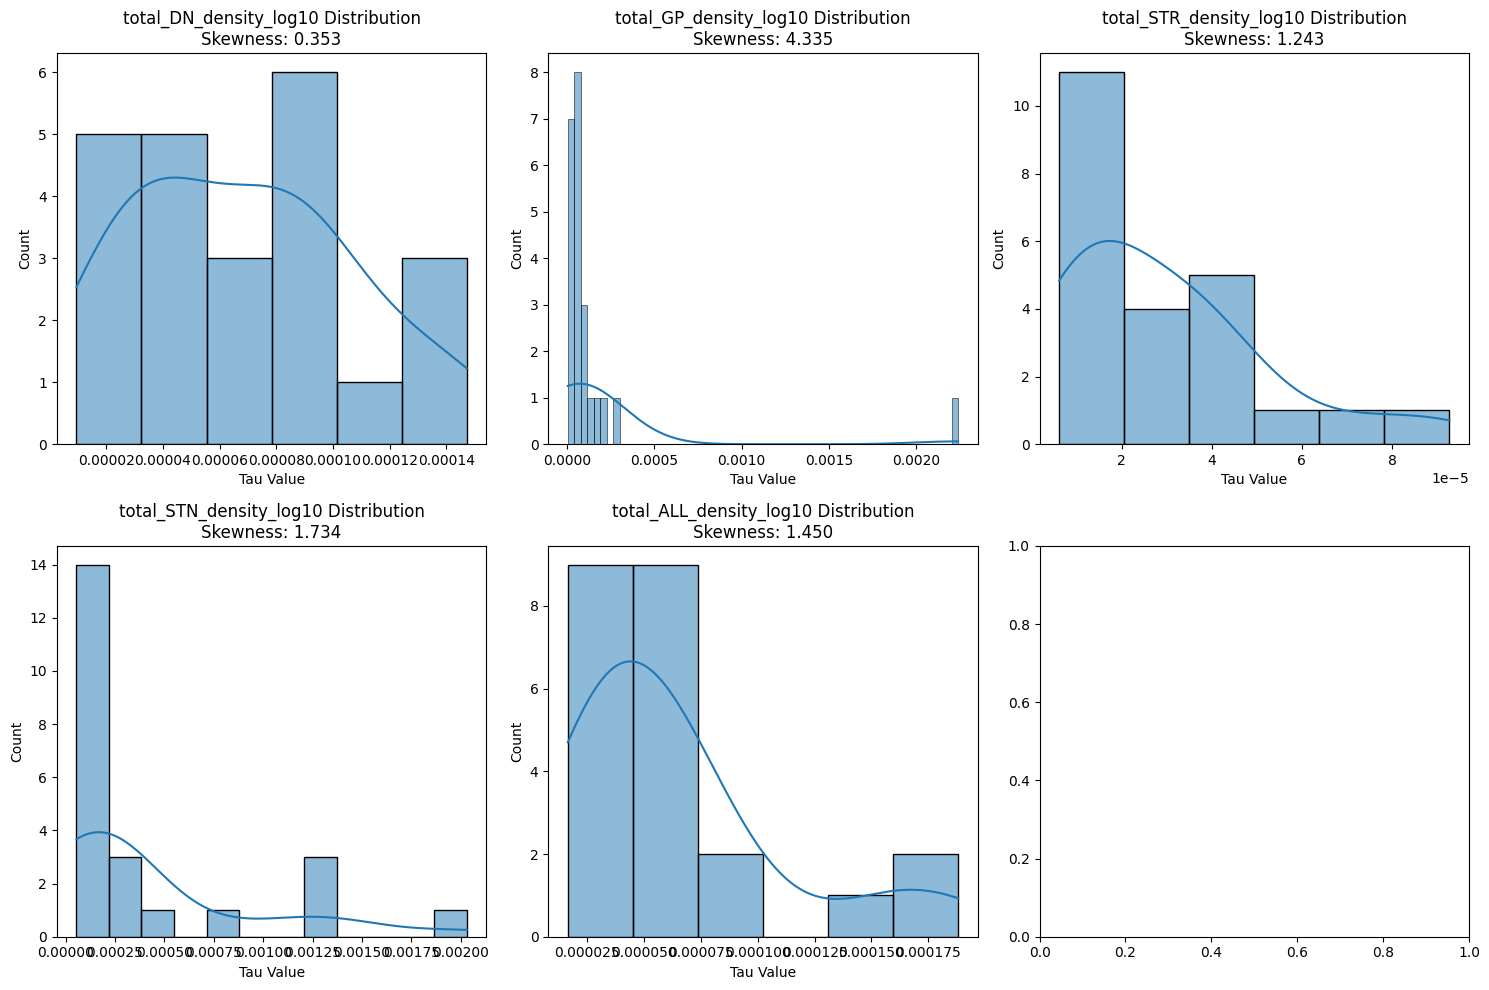

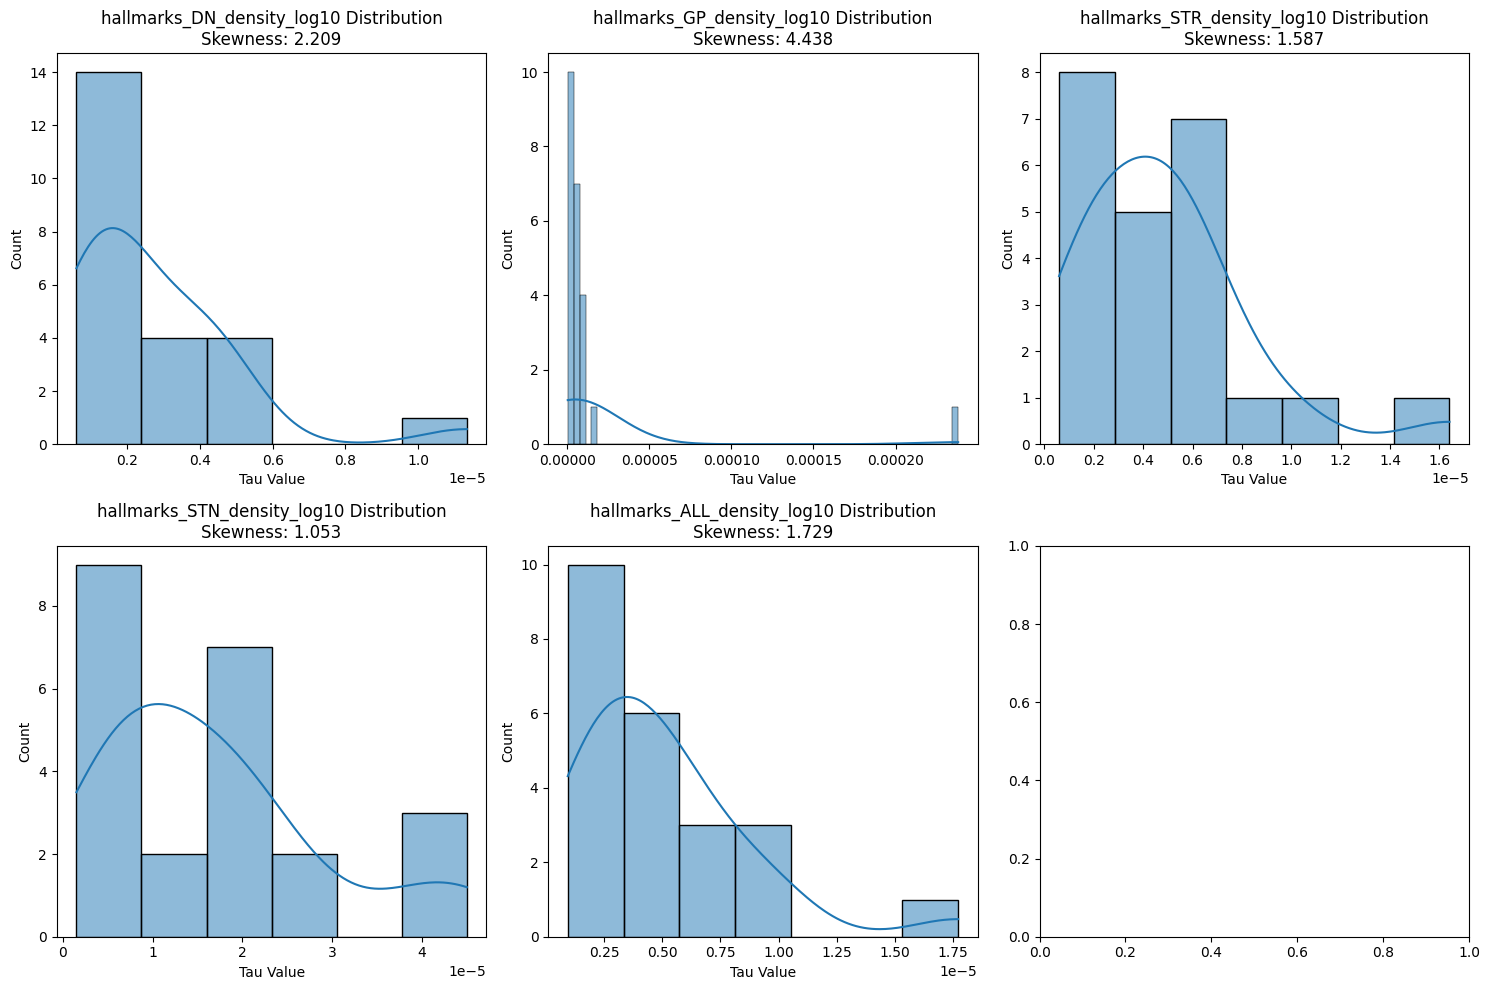

In [73]:
visualize_skewness('TA', log=True)
visualize_skewness('CB', log=True)
visualize_skewness('NFT', log=True)
visualize_skewness('TF', log=True)
visualize_skewness('total', log=True)
visualize_skewness('hallmarks', log=True)

In [ ]:
merged_df['total_ALL_density'] = merged_df['total_ALL'] / (merged_df['Area_GP'] + merged_df['Area_STR'] + merged_df['Area_STN'] + merged_df['Area_DN'])

In [58]:
def compute_all(type):
    merged_df[type+'_ALL'] = merged_df[type+'_GP'] + merged_df[type+'_STR'] + merged_df[type+'_STN'] + merged_df[type+'_DN']
    merged_df[type+'_ALL_density'] = merged_df[type+'_ALL'] / (merged_df['Area_GP'] + merged_df['Area_STR'] + merged_df['Area_STN'] + merged_df['Area_DN'])
compute_all('TA')
compute_all('CB')
compute_all('NFT')
compute_all('TF')

In [70]:
compute_all('hallmarks')

In [59]:
import numpy as np
density_columns = [col for col in merged_df.columns if 'density' in col and 'ALL' in col]

# Create log10 transformed columns
for col in density_columns:
    # Add small constant (1) to handle zeros and apply log10 transformation
    log_col_name = f"{col}_log10"
    merged_df[log_col_name] = np.log10(merged_df[col] + 1)
    
merged_df.columns

Index(['bb_id', 'PSPRS', 'Area_GP', 'Area_STR', 'Area_STN', 'Area_DN', 'TA_DN',
       'CB_DN', 'NFT_DN', 'TF_DN', 'total_DN', 'TA_GP', 'CB_GP', 'NFT_GP',
       'TF_GP', 'TA_STR', 'CB_STR', 'NFT_STR', 'TF_STR', 'TA_STN', 'CB_STN',
       'NFT_STN', 'TF_STN', 'TA_GP_density', 'CB_GP_density', 'NFT_GP_density',
       'TF_GP_density', 'TA_STR_density', 'CB_STR_density', 'NFT_STR_density',
       'TF_STR_density', 'TA_STN_density', 'CB_STN_density', 'NFT_STN_density',
       'TF_STN_density', 'TA_DN_density', 'CB_DN_density', 'NFT_DN_density',
       'TF_DN_density', 'total_GP', 'total_STR', 'total_STN',
       'total_GP_density', 'total_STR_density', 'total_STN_density',
       'total_DN_density', 'total_ALL', 'total_ALL_density',
       'TA_GP_density_log10', 'CB_GP_density_log10', 'NFT_GP_density_log10',
       'TF_GP_density_log10', 'TA_STR_density_log10', 'CB_STR_density_log10',
       'NFT_STR_density_log10', 'TF_STR_density_log10', 'TA_STN_density_log10',
       'CB_STN_density_lo

In [74]:
from scipy.stats import spearmanr

# For individual regions/tau types
for region in ['DN', 'GP', 'STR', 'STN', 'ALL']:
    for tau_type in ['total', 'NFT', 'CB', 'TA', 'TF', 'hallmarks']:
        column_name = f"{tau_type}_{region}_density_log10"
        if column_name in merged_df.columns:
            rho, p_value = spearmanr(merged_df[column_name], merged_df['PSPRS'])
            print(f"{column_name}: rho={rho:.3f}, p-value={p_value:.3f}")

total_DN_density_log10: rho=0.142, p-value=0.518
NFT_DN_density_log10: rho=0.228, p-value=0.295
CB_DN_density_log10: rho=0.485, p-value=0.019
TA_DN_density_log10: rho=0.254, p-value=0.243
TF_DN_density_log10: rho=0.142, p-value=0.518
hallmarks_DN_density_log10: rho=0.479, p-value=0.021
total_GP_density_log10: rho=-0.128, p-value=0.560
NFT_GP_density_log10: rho=0.119, p-value=0.589
CB_GP_density_log10: rho=-0.033, p-value=0.881
TA_GP_density_log10: rho=0.097, p-value=0.660
TF_GP_density_log10: rho=-0.122, p-value=0.580
hallmarks_GP_density_log10: rho=-0.029, p-value=0.895
total_STR_density_log10: rho=0.002, p-value=0.993
NFT_STR_density_log10: rho=0.178, p-value=0.417
CB_STR_density_log10: rho=0.003, p-value=0.987
TA_STR_density_log10: rho=0.030, p-value=0.893
TF_STR_density_log10: rho=-0.001, p-value=0.996
hallmarks_STR_density_log10: rho=-0.016, p-value=0.943
total_STN_density_log10: rho=0.143, p-value=0.515
NFT_STN_density_log10: rho=0.056, p-value=0.798
CB_STN_density_log10: rho=0.1

tau hallmarks?

In [66]:
merged_df['hallmarks_DN'] = merged_df['TA_DN'] + merged_df['CB_DN'] + merged_df['NFT_DN']
merged_df['hallmarks_GP'] = merged_df['TA_GP'] + merged_df['CB_GP'] + merged_df['NFT_GP']
merged_df['hallmarks_STR'] = merged_df['TA_STR'] + merged_df['CB_STR'] + merged_df['NFT_STR']
merged_df['hallmarks_STN'] = merged_df['TA_STN'] + merged_df['CB_STN'] + merged_df['NFT_STN']
merged_df['hallmarks_ALL'] = merged_df['TA_ALL'] + merged_df['CB_ALL'] + merged_df['NFT_ALL']

In [71]:
import numpy as np
density_columns = [col for col in merged_df.columns if 'density' in col and 'hallmarks' in col and 'ALL' in col]

# Create log10 transformed columns
for col in density_columns:
    # Add small constant (1) to handle zeros and apply log10 transformation
    log_col_name = f"{col}_log10"
    merged_df[log_col_name] = np.log10(merged_df[col] + 1)
    
print(f"Created log10 transformed columns for {len(density_columns)} density features")
display(merged_df.head())

Created log10 transformed columns for 1 density features


,bb_id,PSPRS,Area_GP,Area_STR,Area_STN,Area_DN,TA_DN,CB_DN,NFT_DN,TF_DN,...,hallmarks_GP_density,hallmarks_STR_density,hallmarks_STN_density,hallmarks_DN_density,hallmarks_GP_density_log10,hallmarks_STR_density_log10,hallmarks_STN_density_log10,hallmarks_DN_density_log10,hallmarks_ALL_density,hallmarks_ALL_density_log10
0,NP15-00197,47,4.347816e+07,9.798452e+07,4.189264e+06,3.622372e+07,0.0,58.0,107.0,5587.0,...,0.000010,0.000006,0.000024,0.000005,4.474958e-06,2.464339e-06,0.000011,1.978218e-06,0.000007,0.000003
1,NP15-00272,57,1.697559e+07,4.657383e+07,3.817557e+06,1.049692e+07,1.0,26.0,64.0,3467.0,...,0.000019,0.000013,0.000039,0.000009,8.058720e-06,5.660154e-06,0.000017,3.764975e-06,0.000015,0.000006
2,NP16-00042,43,4.257196e+07,1.025558e+08,1.068454e+07,5.505372e+07,0.0,52.0,84.0,4724.0,...,0.000007,0.000008,0.000020,0.000002,2.846187e-06,3.595258e-06,0.000009,1.072843e-06,0.000007,0.000003
3,NP16-00069,49,2.183671e+07,6.737051e+07,8.562177e+06,5.278826e+07,0.0,53.0,38.0,11274.0,...,0.000002,0.000001,0.000016,0.000002,7.159772e-07,5.930646e-07,0.000007,7.486658e-07,0.000002,0.000001
4,NP17-00109,55,3.365823e+07,7.302965e+07,6.095402e+06,2.763294e+07,8.0,73.0,21.0,2997.0,...,0.000009,0.000005,0.000043,0.000004,3.987030e-06,1.980288e-06,0.000019,1.603085e-06,0.000007,0.000003


BG?

In [77]:
for tau_type in ['total', 'NFT', 'CB', 'TA', 'TF', 'hallmarks']:
    type_bg = 0
    column_name = f"{tau_type}_BG_density_log10"
    for region in ['GP', 'STR', 'STN']:
        type_bg += merged_df[f"{tau_type}_{region}"]
    merged_df[column_name] = type_bg
    merged_df[column_name+'_density'] = merged_df[column_name] / (merged_df['Area_GP'] + merged_df['Area_STR'] + merged_df['Area_STN'])
    merged_df[column_name+'_density_log10'] = np.log10(merged_df[column_name+'_density'] + 1)

In [82]:
from scipy.stats import spearmanr
import pandas as pd

# Create a list to store results
results = []

# For individual regions/tau types
for region in ['DN', 'GP', 'STR', 'STN', 'ALL', 'BG']:
    for tau_type in ['total', 'NFT', 'CB', 'TA', 'TF', 'hallmarks']:
        column_name = f"{tau_type}_{region}_density_log10"
        if column_name in merged_df.columns:
            rho, p_value = spearmanr(merged_df[column_name], merged_df['PSPRS'])
            results.append({
                'Region': region,
                'Tau Type': tau_type,
                'Column': column_name,
                'Spearman rho': round(rho, 3),
                'p-value': round(p_value, 3)
            })

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='p-value', ascending=True)

# Display the table
display(results_df)

# Highlight significant correlations (p < 0.05)
from IPython.display import display
significant_results = results_df[results_df['p-value'] < 0.05].sort_values(by='Spearman rho', ascending=False)
display(significant_results)

,Region,Tau Type,Column,Spearman rho,p-value
2,DN,CB,CB_DN_density_log10,0.485,0.019
5,DN,hallmarks,hallmarks_DN_density_log10,0.479,0.021
21,STN,TA,TA_STN_density_log10,0.294,0.174
3,DN,TA,TA_DN_density_log10,0.254,0.243
31,BG,NFT,NFT_BG_density_log10,0.245,0.260
1,DN,NFT,NFT_DN_density_log10,0.228,0.295
26,ALL,CB,CB_ALL_density_log10,0.216,0.323
29,ALL,hallmarks,hallmarks_ALL_density_log10,0.200,0.360
25,ALL,NFT,NFT_ALL_density_log10,0.180,0.411
13,STR,NFT,NFT_STR_density_log10,0.178,0.417


,Region,Tau Type,Column,Spearman rho,p-value
2,DN,CB,CB_DN_density_log10,0.485,0.019
5,DN,hallmarks,hallmarks_DN_density_log10,0.479,0.021


In [85]:
# Create formatted table for dissertation
dissertation_table = pd.DataFrame(results)

# Format numbers and add significance symbols
dissertation_table['Correlation'] = dissertation_table.apply(
    lambda x: f"{x['Spearman rho']:.3f}{' ***' if x['p-value'] < 0.001 else ' **' if x['p-value'] < 0.01 else ' *' if x['p-value'] < 0.05 else ''}", 
    axis=1
)

# Pivot table to show regions vs tau types
pivot_table = dissertation_table.pivot_table(
    index='Region', 
    columns='Tau Type',
    values='Correlation',
    aggfunc='first'
)

# Set specific row order as requested
custom_order = ['ALL', 'DN', 'BG', 'STN', 'GP', 'STR']
# Filter for regions that exist in the data
valid_regions = [region for region in custom_order if region in pivot_table.index]
pivot_table = pivot_table.reindex(valid_regions)

print("Table for dissertation:")
display(pivot_table)
print("* p < 0.05, ** p < 0.01, *** p < 0.001")

Table for dissertation:


Tau Type,CB,NFT,TA,TF,hallmarks,total
Region,,,,,,
ALL,0.216,0.180,0.095,-0.095,0.200,-0.060
DN,0.485 *,0.228,0.254,0.142,0.479 *,0.142
BG,0.052,0.245,0.074,-0.100,0.066,-0.097
STN,0.143,0.056,0.294,0.096,0.150,0.143
GP,-0.033,0.119,0.097,-0.122,-0.029,-0.128
STR,0.003,0.178,0.030,-0.001,-0.016,0.002


* p < 0.05, ** p < 0.01, *** p < 0.001
